# Surface energy balance

## Background
The surface energy balance (SEB) is a framework to describe exchange processes between atmosphere and land and can be written as
			$$
				R_{net} - G  = SH + LH + I_{SEB}			
			$$
with net radiation $R_{net} = SW\downarrow - SW\uparrow + LW\downarrow - LW\uparrow$ (combining shortwave (SW) and longwave (LW), incoming ($\downarrow$) and outgoing ($\uparrow$) radiative fluxes) and the ground heat flux $G$. The turbulent fluxes are given by
			\begin{align}
				SH = \rho c_p \overline{w'T'} \quad \textrm{  and  } \quad LH = \rho L_v \overline{w'q'}
			\end{align}
			with the air density $\rho$, the heat capacity of air (under constant pressure) $c_p$ and the latent heat of vaporization $L_v$.
			Positive latent heat fluxes (LH) represent evaporation or transpiration, whereas negative LH indicates condensation or deposition of water (vapor).
			The last term $I_{SEB}$ describes the imbalance (or residual flux). Depending on the value of $I_{SEB}$, the SEB is called closed or unclosed
			\begin{align}
				I_{SEB} \begin{cases}
					= 0 \rightarrow \textrm{closed} \\
					\ne 0 \rightarrow \textrm{unclosed}
				\end{cases}
			\quad \textrm{and} \quad
			CR := \frac{R_{net}-G}{SH+LH} \begin{cases}
				= 1 \rightarrow \textrm{closed} \\
				\ne 1 \rightarrow \textrm{unclosed},
			\end{cases}	
			\end{align}
			which can also be expressed in a relative measure, the closure ratio CR. The advantage of the closure ratio is the normalization by the available radiation, but the disadvantage is a cancellation of biases. Wilson et al., 2002 showed based on the FLUXNET towers, that there is on average a SEB unclosure of 20-30 \%. Reasons for the unclosure are (similar to the TKE budget unclosure) horizontal advection, flux divergence, submeso-scale motions, different measurement footprints, melting, runoff or rain fluxes, canopy interactions as well as possible measurement and post-processing errors (as in great detail reviewed by Mauder et al., 2020). Notably, Stoy et al., 2013 found a larger unclosure in heterogeneous terrain and a correlation with friction velocity. 

## Calculating surface energy balance

In [1]:
#loading Reddy package
install.packages("../src/Reddy_0.0.0.9000.tar.gz",repos=NULL,source=TRUE)
library(Reddy)
library(dplyr)
sigma=5.67*10^(-8)

#read in processed example data
dat=readRDS("../data/ec-data_30min_processed/processed_data_example.rds")
dat$TIME=as.POSIXct(dat$time,format="%F %T")

Installing package into ‘/home/lauracma/R/x86_64-pc-linux-gnu-library/4.0’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




**Plotting of surface energy balance with `plot_seb`** <br>
The function `plot_seb`plots the surface energy balance as time series and as scatter plot (R-GH, SH+LH) with linear regression as well as calculates the residual flux and the closure ratio.

In [2]:
#read in radiation data
dat_rad=read.table("../data//radiation-data_30min//biomet_data.csv",sep=",",header=T)
colnames(dat_rad)=c("time","rh","ta","swin","swout","lwin","lwout","shf1","shf2")
dat_rad$TIME=as.POSIXct(dat_rad$time,format="%F %T")

In [3]:
dat=inner_join(dat,dat_rad,by="TIME")
dat

time.x,u_mean,v_mean,w_mean,ws_mean,wd_mean,T_mean,h2o_mean,co2_mean,u_sd,⋯,TIME,time.y,rh,ta,swin,swout,lwin,lwout,shf1,shf2
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dttm>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2018-07-20 08:30:00,2.872084,-3.939352e-16,6.931732e-06,2.873170,-2.289284,15.86938,0.007254132,0.0006009614,1.0621428,⋯,2018-07-20 08:30:00,2018-07-20 08:30:00,56.54792,16.287746,715.440996,105.7313682,312.4243,458.7009,21.596913,1.68270551
2018-07-20 09:00:00,2.864793,7.504684e-17,9.052527e-08,2.864538,-2.326045,16.55190,0.007584267,0.0005978138,1.1051216,⋯,2018-07-20 09:00:00,2018-07-20 09:00:00,54.34070,16.774326,756.265817,109.9171071,319.3567,460.9099,26.812897,1.95237364
2018-07-20 09:30:00,3.996526,9.365292e-16,3.049021e-05,4.002522,-2.035397,17.05704,0.007472065,0.0005954894,1.4094952,⋯,2018-07-20 09:30:00,2018-07-20 09:30:00,47.65451,17.402094,797.975058,112.8785627,301.3082,463.2456,30.599971,2.13950728
2018-07-20 10:00:00,4.998016,-2.812846e-16,-2.391239e-06,4.997530,-1.977737,17.60447,0.006762097,0.0005953881,1.2893259,⋯,2018-07-20 10:00:00,2018-07-20 10:00:00,36.98989,18.087188,809.704785,114.7405553,295.6089,467.7517,33.011363,2.27006715
2018-07-20 10:30:00,4.879095,4.062636e-16,2.187117e-05,4.880696,-2.014489,18.08994,0.005410862,0.0005948927,1.4699485,⋯,2018-07-20 10:30:00,2018-07-20 10:30:00,30.13753,18.327501,823.015033,117.3849189,291.3130,469.1732,34.708690,2.29979151
2018-07-20 11:00:00,5.225037,-8.977916e-17,-6.972624e-06,5.223984,-2.261205,18.24207,0.004422858,0.0005954766,1.3192267,⋯,2018-07-20 11:00:00,2018-07-20 11:00:00,25.45414,18.608874,827.858750,118.4659019,288.2217,467.7229,34.789179,2.28431539
2018-07-20 11:30:00,5.896774,-7.481298e-16,-4.307951e-05,5.893156,-2.141157,18.50137,0.003765156,0.0005955767,1.4571181,⋯,2018-07-20 11:30:00,2018-07-20 11:30:00,23.37856,18.701896,825.984820,119.8238286,286.5863,471.7829,32.797710,2.20964982
2018-07-20 12:00:00,5.211296,-3.062741e-16,-1.461607e-05,5.209715,-2.253118,18.57772,0.003418867,0.0005955199,1.2629639,⋯,2018-07-20 12:00:00,2018-07-20 12:00:00,23.45499,18.964067,808.988981,118.7011108,289.1710,475.5844,33.287449,2.21530101
2018-07-20 12:30:00,4.295926,-7.486225e-16,-1.727795e-06,4.295548,-2.194560,18.80679,0.003522845,0.0005946848,1.3898230,⋯,2018-07-20 12:30:00,2018-07-20 12:30:00,22.08109,18.980666,786.158806,116.7579311,289.2690,474.9449,33.313854,2.27206972


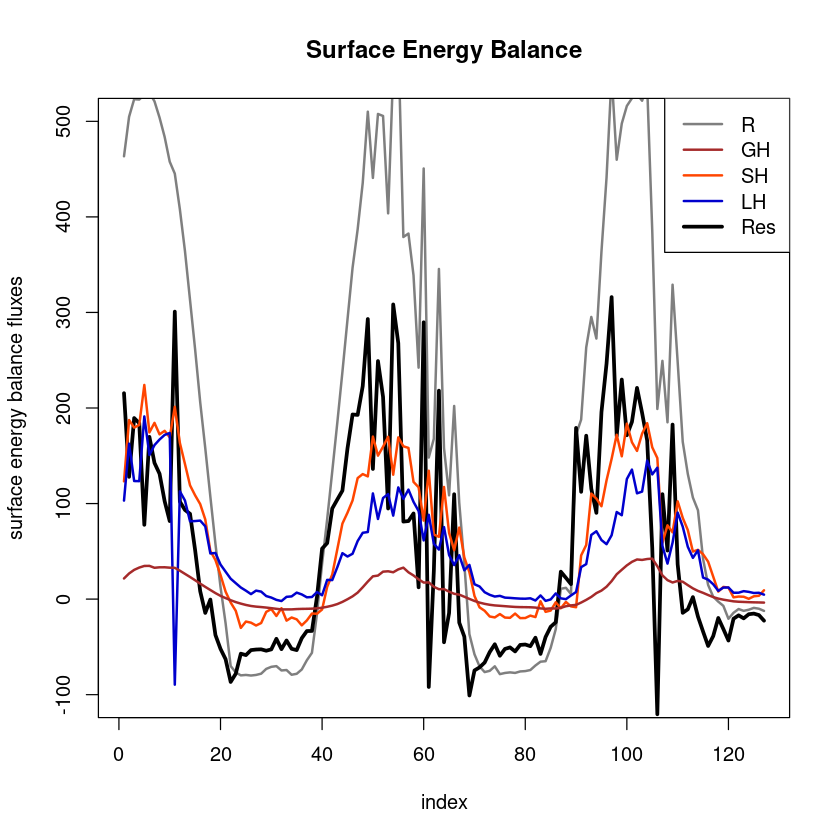


Call:
lm(formula = y ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
-134.13  -19.47   -5.41   28.33  170.39 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 27.66214    5.45569    5.07  1.4e-06 ***
x            0.52887    0.02051   25.78  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 48.56 on 125 degrees of freedom
Multiple R-squared:  0.8417,	Adjusted R-squared:  0.8405 
F-statistic: 664.7 on 1 and 125 DF,  p-value: < 2.2e-16



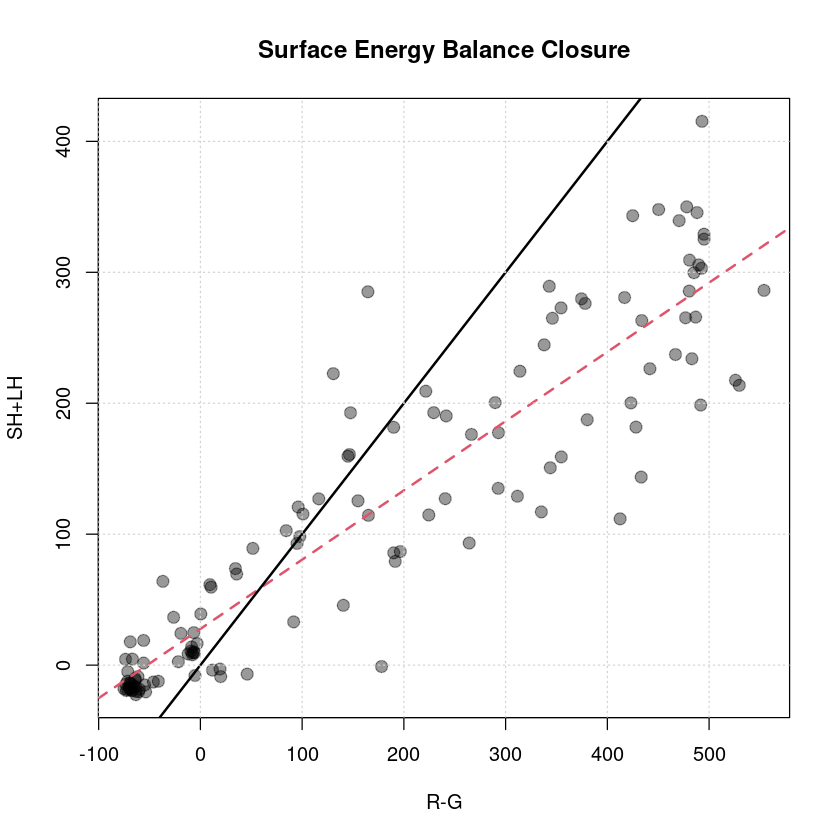

In [4]:
plot_seb(dat$swin,dat$swout,dat$lwin,dat$lwout,dat$sh,dat$lh,dat$shf1)



## Bowen ratio and evaporative fraction
The Bowen ratio $BR$ and the evaporative fraction $EF$ are given by
$$
    BR:= \frac{SH}{LH}\quad\quad\textrm{and}\quad\quad EF:= \frac{LH}{LH+SH}
$$
and are both a way to describe the heat transfer by sensible vs latent heat. They are related to the surface (and the water abundance therein) and can be used to compare different surface types in different climates. Therefore, it usually applied on monthly/seasonal/annual averages (so here just exemplarily calculated).

In [6]:
print(paste("BR (average):", calc_br(mean(dat$sh),mean(dat$lh))))
print(paste("EF (average):", calc_ef(mean(dat$sh),mean(dat$lh))))

[1] "BR (average): 1.2715665126865"
[1] "EF (average): 0.440224837976387"


## Clear-Sky-Index (CSI) for contextualization (`calc_csi`)
Based on longwave incoming radiation, temperature and humidity, an estimate of the clear-sky-index (CSI) can be derived as ratio of actual emissivity $\epsilon_{actual}$ and theoretical (clear-sky) emissivity $\epsilon_{theoretical}$. If $\epsilon_{actual} \le \epsilon_{theoretical}$, i.e. $CSI \le 1$, than the sky is assumed to be clear-sky (see e.g. in the review paper Lehner et al., 2021).

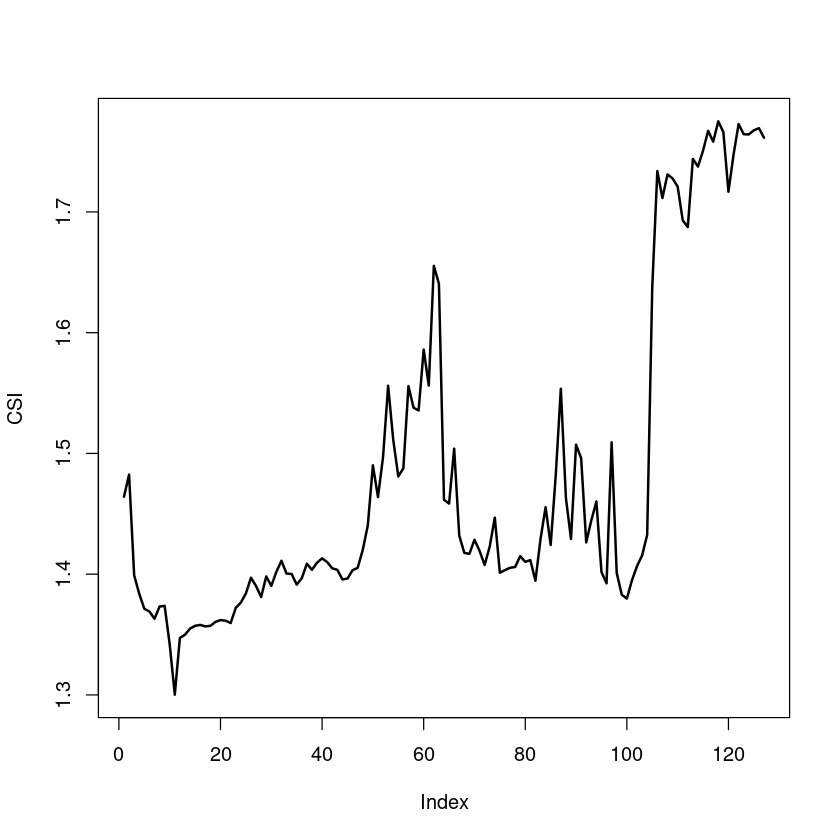

In [7]:
dat$csi=calc_csi(dat$T_mean+273.15,dat$lwin,dat$rh)
plot(dat$csi,type="l",lwd=2,ylab="CSI")

## Literature
- Lehner, M., Rotach, M. W. Sfyri, E., and Obleitner, F. (2021). Spatial and temporal variations in near-surface en-
ergy fluxes in an Alpine valley under synoptically undisturbed and clear-sky conditions. Q J R Meteorol Soc,
147(737):2173–2196.
- Mauder, M. and Foken, T. and Cuxart, J. (2020). Surface‑Energy‑Balance Closure over Land: A Review, Boundary-Layer Meteorology 177:395–426.
- Stoy, P., Mauder, M., Foken, T., and et al (2013). A data-driven analysis of energy balance closure across FLUXNET research sites: The role of landscape
scale heterogeneity. Agric For Meteorol, 171:137–152.
- Wilson, K., Goldstein, A., Falge, E., Aubinet, M., Baldocchi, D., Berbigier, P., Bernhofer,
C., Ceulemans, R., Dolman, H., Field, C., Grelle, A., Ibrom, A., Law, B.E., Kowalski,
A., Meyers, T., Moncrieff, J., Monson, R., Oechel, W., Tenhunen, J., Valentini, R.,
Verma, S., 2002. Energy balance closure at FLUXNET sites. Agric. Forest Meteorol.
113, 223–243.